## Author : Jean-Marie Kimemia Wachira


# Introduction

## 1.1 Overview

The goal of the project is to use exploratory data analysis to generate insights for Microsoft. Microsoft wants to venture into creating original video content, hence, are opening a new movie studio. Microsoft would like actionable insights that the head of it's new movie studio can use to help decide what type of films to create.


## 1.2 Objectives

This objective can be met by following the following steps:
- Data selection
- Data cleaning
- Data analysis
- Data visualization

## 1.3 Questions to answer

-  What type of films are currently doing the best ?
    - a) What films are the highest grossing?
    - b) What are the highest rated movies?
    - c) Does rating affect movie revenue?
    - d) Does budget affect movie profits?
    - e) Best time to debut a movie?
     


# 2*.Data Wrangling*

## 2.1 Data Description

The data files used for this project are:
1. tn.movie_budget.csv.gz
2. bom.movie_gross.csv.gz
3. tmdb.movies.csv.gz
4. rt.reviews.tsv.gz
5. im.db
6. rt.movie_info.tsv.gz
7. tmdb_popular_movies.json(webscraping)

The datasets are extracted from the following sites:

- Box Office.
- IMDB.
- Rotten Tomatoes.
- TheMovieDB.
- The Numbers.


## 2.2 Loading Datasets and Libraries

In [2]:
#importing the libraies required

import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

In [3]:
#reading the datasets into a dataframe
df_gross = pd.read_csv('Data/bom.movie_gross.csv.gz')
df_budget = pd.read_csv("Data/tn.movie_budgets.csv.gz")
df_movies = pd.read_csv('Data/tmdb.movies.csv.gz', index_col=0)
df_movieInfo= pd.read_table('Data/rt.movie_info.tsv.gz')
df_reviews = pd.read_table('Data/rt.reviews.tsv.gz', encoding= 'windows-1254')
df_best_movies = pd.read_json('Data/tmdb_popular_movies.json')
conn = sqlite3.connect('Data/im.db')

## 2.2.1 Prievewing datasets

In [4]:
# Previewing the first dataset
movie_basics_df = pd.read_sql_query("""
SELECT *
FROM movie_basics
LIMIT 10
;""", conn)

movie_basics_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# Previewing the second dataset
movie_ratings_df = pd.read_sql_query("""
SELECT *
FROM movie_ratings
LIMIT 10
;""", conn)

movie_ratings_df.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
# Previewing the third dataset
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# Previewing the fourth dataset
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# Previewing the fifth dataset
df_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
# Previewing the sixth dataset
df_movieInfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
# Previewing the seventh dataset
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 2.2.2 Accessing Datasets

In [11]:
# Accessing more information on the dataset
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
df_gross.shape

(3387, 5)

This shows that the dataset has 3387 rows and 5 columns

In [13]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
df_budget.shape

(5782, 6)

This shows that the dataset has 5782 rows and 6 columns

In [15]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [16]:
df_movies.shape

(26517, 9)

This shows that the dataset has 26517 rows and 9 columns

In [17]:
df_movieInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [18]:
df_movieInfo.shape

(1560, 12)

This shows that the dataset has 1560 rows and 12 columns

In [19]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [20]:
df_reviews.shape

(54432, 8)

This shows that the dataset has 54432 rows and 8 columns

In [21]:
df_best_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  10000 non-null  bool   
 1   backdrop_path          9662 non-null   object 
 2   belongs_to_collection  2734 non-null   object 
 3   budget                 10000 non-null  int64  
 4   genres                 10000 non-null  object 
 5   homepage               10000 non-null  object 
 6   id                     10000 non-null  int64  
 7   imdb_id                9768 non-null   object 
 8   original_language      10000 non-null  object 
 9   original_title         10000 non-null  object 
 10  overview               10000 non-null  object 
 11  popularity             10000 non-null  float64
 12  poster_path            9963 non-null   object 
 13  production_companies   10000 non-null  object 
 14  production_countries   10000 non-null  object 
 15  rel

In [22]:
df_best_movies.shape

(10000, 25)

This shows that the dataset has 10000 rows and 25 columns

# 2.3 Data cleaning

## 2.3.1 Gross Dataset

In [23]:
# In this dataset we are checking for missing values in all columns
df_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [24]:
df_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [25]:
# After we found the missing values we are dropping along the rows

df_gross.dropna(axis=0, subset = ['domestic_gross'], inplace=True)
df_gross.dropna(axis=0, subset = ['foreign_gross'], inplace=True)
df_gross.dropna(axis=0, subset = ['studio'], inplace=True)

In [26]:
# after dropping the rows we have no missing values
df_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [27]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [28]:
# checking for dupllicates
df_gross.duplicated().sum()

0

In [29]:
# changing the domestic gross to be an integer from float
df_gross['domestic_gross'] = df_gross['domestic_gross'].astype('int64')


In [30]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int64 
 3   foreign_gross   2007 non-null   object
 4   year            2007 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 94.1+ KB


In [31]:
# removing the comma and the fullstop in the numerical values
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace('.', '')
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(',', '')


In [32]:
# Arranging the foreign gross in descending order
df_gross.sort_values('foreign_gross').head(5)

,title,studio,domestic_gross,foreign_gross,year
3009,City of Ghosts,IFC,128000,100000,2017
989,Once Upon a Time in Anatolia,CGld,152000,1000000,2012
594,Vanishing on 7th Street,Magn.,22700,1000000,2011
2539,Desierto,STX,2000000,1000000,2016
955,Kid With a Bike,IFC,1500000,1000000,2012


In [33]:
df_gross['foreign_gross'] = df_gross['foreign_gross'].astype('int64')

In [34]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int64 
 3   foreign_gross   2007 non-null   int64 
 4   year            2007 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 94.1+ KB


## 2.3.2 Budget info

In [35]:
# checking what to clean in this dataset
df_budget.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [36]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [37]:
# checking for missing values 
df_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [38]:
# checking for duplicates
df_budget.duplicated().sum()

0

In [39]:
# removing the $ and , from the rows in the production budget, domestic gross and worlwide gross columns

df_budget['production_budget'] = df_budget['production_budget'].str.replace('$', '')
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')

In [40]:
df_budget.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350


In [41]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [42]:
#changing the object type to integer

df_budget['production_budget'] = df_budget['production_budget'].astype('int64')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')

In [43]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [44]:
# Arranging the worlwide gross by ascending order
df_budget.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5037,38,"Apr 23, 2019",Living Dark: The Story of Ted the Caver,1750000,0,0
3975,76,"May 15, 2015",Pound of Flesh,7500000,0,0
4627,28,"Jun 28, 2011",2:13,3500000,0,0
4628,29,"Jan 29, 2013","Batman: The Dark Knight Returns, Part 2",3500000,0,0
3947,48,"Jun 21, 2019",Burn Your Maps,8000000,0,0
...,...,...,...,...,...,...
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395


In [45]:
# droping the 0 values in domestic gross and worldwide gross

budget_drop = df_budget[(df_budget['domestic_gross'] == 0) & (df_budget['worldwide_gross'] == 0)]
budget_drop.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,150000000,0,0
479,80,"Dec 13, 2017",Bright,90000000,0,0
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0


In [46]:
# dropping the values
df_budget.drop(budget_drop.index, axis=0, inplace=True)

In [47]:
df_budget.head(4)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963


In [48]:
df_budget.shape

(5415, 6)

## 2.3.3 Movies Dataset

In [49]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [50]:
df_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [51]:
# checking for missing values 
df_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [52]:
# checking for duplicates

df_movies.duplicated(subset=['title', 'release_date']).sum()

1027

In [53]:
# removing the duplicates from the title and release date columns
df_movies.drop_duplicates(subset=['title', 'release_date'], keep=False, inplace=True)

In [54]:
df_movies.duplicated().sum()

0

In [55]:
df_movies.shape

(24488, 9)

## 2.3.4 Best_movies_scrap

In [56]:
df_best_movies.head(5)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/yYrvN5WFeGYjJnRzhY0QXuo4Isw.jpg,"{'id': 529892, 'name': 'Black Panther Collecti...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://wakandaforevertickets.com,505642,tt9114286,en,Black Panther: Wakanda Forever,...,2022-11-09,365000000,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Forever.,Black Panther: Wakanda Forever,False,7.536,679
1,False,/olPXihyFeeNvnaD6IOBltgIV1FU.jpg,None,17000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",https://www.smile.movie/,882598,tt15474916,en,Smile,...,2022-09-23,209981872,115,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Once you see it, it’s too late.",Smile,False,6.784,574
2,False,/bQXAqRx2Fgc46uCVWgoPz5L5Dtr.jpg,None,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",https://www.dc.com/BlackAdam,436270,tt6443346,en,Black Adam,...,2022-10-19,351000000,125,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The world needed a hero. It got Black Adam.,Black Adam,False,6.900,1124
3,False,/bZ6hEHRoOB5wGkRm9P8AchduODu.jpg,None,1000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,966220,tt19465630,uk,Снайпер. Білий ворон,...,2022-05-03,0,120,"[{'english_name': 'Ukrainian', 'iso_639_1': 'u...",Released,"On the battlefield, one bullet can change ever...",Sniper: The White Raven,False,7.396,77
4,False,/y5Z0WesTjvn59jP6yo459eUsbli.jpg,"{'id': 727761, 'name': 'Terrifier Collection',...",250000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.terrifier2themovie.com/,663712,tt10403420,en,Terrifier 2,...,2022-10-06,10155347,138,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Who's laughing now?,Terrifier 2,False,7.000,605


In [57]:
df_best_movies.isna().sum()

adult                       0
backdrop_path             338
belongs_to_collection    7266
budget                      0
genres                      0
homepage                    0
id                          0
imdb_id                   232
original_language           0
original_title              0
overview                    0
popularity                  0
poster_path                37
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
status                      0
tagline                     0
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

In [58]:
df_best_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  10000 non-null  bool   
 1   backdrop_path          9662 non-null   object 
 2   belongs_to_collection  2734 non-null   object 
 3   budget                 10000 non-null  int64  
 4   genres                 10000 non-null  object 
 5   homepage               10000 non-null  object 
 6   id                     10000 non-null  int64  
 7   imdb_id                9768 non-null   object 
 8   original_language      10000 non-null  object 
 9   original_title         10000 non-null  object 
 10  overview               10000 non-null  object 
 11  popularity             10000 non-null  float64
 12  poster_path            9963 non-null   object 
 13  production_companies   10000 non-null  object 
 14  production_countries   10000 non-null  object 
 15  rel

In [59]:
#dropping the columns we dont need

df_best_movies.drop(columns = 'poster_path', inplace=True)
df_best_movies.drop(columns = 'backdrop_path', inplace=True)
df_best_movies.drop(columns = 'imdb_id', inplace=True)

In [60]:
df_best_movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 529892, 'name': 'Black Panther Collecti...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://wakandaforevertickets.com,505642,en,Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",3728.879,...,2022-11-09,365000000,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Forever.,Black Panther: Wakanda Forever,False,7.536,679
1,False,None,17000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",https://www.smile.movie/,882598,en,Smile,"After witnessing a bizarre, traumatic incident...",3419.675,...,2022-09-23,209981872,115,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Once you see it, it’s too late.",Smile,False,6.784,574
2,False,None,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",https://www.dc.com/BlackAdam,436270,en,Black Adam,"Nearly 5,000 years after he was bestowed with ...",4430.630,...,2022-10-19,351000000,125,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The world needed a hero. It got Black Adam.,Black Adam,False,6.900,1124
3,False,None,1000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,966220,uk,Снайпер. Білий ворон,Mykola is an eccentric pacifist who wants to b...,2665.449,...,2022-05-03,0,120,"[{'english_name': 'Ukrainian', 'iso_639_1': 'u...",Released,"On the battlefield, one bullet can change ever...",Sniper: The White Raven,False,7.396,77
4,False,"{'id': 727761, 'name': 'Terrifier Collection',...",250000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.terrifier2themovie.com/,663712,en,Terrifier 2,"After being resurrected by a sinister entity, ...",2107.165,...,2022-10-06,10155347,138,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Who's laughing now?,Terrifier 2,False,7.000,605


In [61]:
df_best_movies.sort_values('revenue').head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
4999,False,"{'id': 148065, 'name': 'Doraemon Collection', ...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 14, '...",,98613,ja,ドラえもん のび太とふしぎ風使い,"One day, Nobita runs into a creature-like ball...",19.514,...,2003-03-08,0,90,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,Doraemon: Nobita and the Windmasters,False,7.300,41
3377,False,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,235704,ko,동창생,The son of a North Korean spy decides to follo...,25.631,...,2013-11-05,0,113,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,He'll stop nothing to save her.,Commitment,False,7.284,102
6987,False,None,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://backcountryfilm.com/,228973,en,Backcountry,A couple on a deep-wilderness hike become hope...,19.866,...,2014-03-20,0,92,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Survive.,Backcountry,False,5.845,500
3375,False,None,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.netflix.com/title/81106402,944664,es,Hasta que nos volvamos a encontrar,The opposite lives of a workaholic architect a...,31.707,...,2022-03-18,0,96,"[{'english_name': 'Sinhalese', 'iso_639_1': 's...",Released,,Without Saying Goodbye,False,7.300,101
6990,False,"{'id': 980774, 'name': 'The Gods Must Be Crazy...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",,50507,cn,非洲和尚,"Two guys, one of them a magician, are transpor...",16.381,...,1991-07-05,0,96,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,,Crazy Safari,False,4.779,34


In [62]:
# Arranging the values in ascending order
df_best_movies.sort_values('revenue').head()

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
4999,False,"{'id': 148065, 'name': 'Doraemon Collection', ...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 14, '...",,98613,ja,ドラえもん のび太とふしぎ風使い,"One day, Nobita runs into a creature-like ball...",19.514,...,2003-03-08,0,90,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,Doraemon: Nobita and the Windmasters,False,7.300,41
3377,False,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,235704,ko,동창생,The son of a North Korean spy decides to follo...,25.631,...,2013-11-05,0,113,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,He'll stop nothing to save her.,Commitment,False,7.284,102
6987,False,None,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://backcountryfilm.com/,228973,en,Backcountry,A couple on a deep-wilderness hike become hope...,19.866,...,2014-03-20,0,92,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Survive.,Backcountry,False,5.845,500
3375,False,None,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.netflix.com/title/81106402,944664,es,Hasta que nos volvamos a encontrar,The opposite lives of a workaholic architect a...,31.707,...,2022-03-18,0,96,"[{'english_name': 'Sinhalese', 'iso_639_1': 's...",Released,,Without Saying Goodbye,False,7.300,101
6990,False,"{'id': 980774, 'name': 'The Gods Must Be Crazy...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",,50507,cn,非洲和尚,"Two guys, one of them a magician, are transpor...",16.381,...,1991-07-05,0,96,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,,Crazy Safari,False,4.779,34


## 2.3.4 Movies info

In [63]:
df_movieInfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [64]:
df_movieInfo.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [65]:
# checking the data
df_movieInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [66]:
# dropping the rows along the genre column
df_movieInfo.dropna(axis=0, subset = ['genre'], inplace=True)

In [67]:
# dropping the box office columns
df_movieInfo.drop(columns='box_office', inplace= True)

In [68]:
#dropping the currency
df_movieInfo.drop(columns='currency', inplace= True)

In [69]:
df_movieInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1552 non-null   int64 
 1   synopsis      1495 non-null   object
 2   rating        1552 non-null   object
 3   genre         1552 non-null   object
 4   director      1360 non-null   object
 5   writer        1110 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   runtime       1526 non-null   object
 9   studio        494 non-null    object
dtypes: int64(1), object(9)
memory usage: 133.4+ KB


In [70]:
df_movieInfo

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes,NaN


## 2.4 Merging Datasets

In this part we are going to merge the datasets that we need in order to work with the data we need 

In [71]:
# arrange the worldwide gross in ascending order
df_budget.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5302,3,"Dec 11, 2015",American Hero,1000000,0,26
5335,36,"Nov 21, 2014",Food Chains,913000,0,176
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000,401,401
5518,19,"Oct 13, 2005",The Dark Hours,400000,423,423
5383,84,"Dec 31, 2014",Destiny,750000,0,450
...,...,...,...,...,...,...
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395


In [72]:
# we are going to join moviebasics and movieratings usinf movie id as the primary key 
movie_genre_df = movie_basics_df = pd.read_sql_query("""
SELECT genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
LIMIT 150
;""", conn)

movie_genre_df.head()


,genres,averagerating,numvotes
0,"Action,Crime,Drama",7.0,77
1,"Biography,Drama",7.2,43
2,Drama,6.9,4517
3,"Comedy,Drama",6.1,13
4,"Comedy,Drama,Fantasy",6.5,119


In [73]:
#create a new data frame called combined_df and join the df_budget dataset
combined_df= movie_genre_df.join(df_budget)
combined_df

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Crime,Drama",7.0,77,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"Biography,Drama",7.2,43,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Drama,6.9,4517,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"Comedy,Drama",6.1,13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Comedy,Drama,Fantasy",6.5,119,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...,...,...,...
145,Musical,7.8,25,46,"Jun 10, 2016",Warcraft,160000000,47225655,425522281
146,Drama,6.5,14708,47,"Sep 30, 2016",Deepwater Horizon,156000000,61433527,122603824
147,"Action,Comedy,Crime",6.9,27986,48,"Dec 10, 2010",The Chronicles of Narnia: The Voyage of the Da...,155000000,104386950,418186950
148,"Comedy,Drama",4.1,128,49,"Jul 1, 2015",Terminator: Genisys,155000000,89760956,432150894


In [74]:
combined_df

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Crime,Drama",7.0,77,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"Biography,Drama",7.2,43,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Drama,6.9,4517,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"Comedy,Drama",6.1,13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Comedy,Drama,Fantasy",6.5,119,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...,...,...,...
145,Musical,7.8,25,46,"Jun 10, 2016",Warcraft,160000000,47225655,425522281
146,Drama,6.5,14708,47,"Sep 30, 2016",Deepwater Horizon,156000000,61433527,122603824
147,"Action,Comedy,Crime",6.9,27986,48,"Dec 10, 2010",The Chronicles of Narnia: The Voyage of the Da...,155000000,104386950,418186950
148,"Comedy,Drama",4.1,128,49,"Jul 1, 2015",Terminator: Genisys,155000000,89760956,432150894


In [75]:
# checking for duplicates
combined_df.duplicated().sum()

0

In [76]:
combined_df.drop_duplicates(keep=False, inplace=True)

In [77]:
# renameing the columns production domestic and worldwide to fit the description in millions
combined_df.rename(columns={'production_budget':'production_budget_m','domestic_gross':'domestic_gross_m','worldwide_gross':'worldwide_gross_m'},inplace=True)

In [78]:
# finding the aggregate to get the profits
# create a new column that has the profits
combined_df['movie_profits_millions'] = ((combined_df['worldwide_gross_m'] - combined_df['production_budget_m']))

In [79]:
# dropping the id column
combined_df.drop('id', inplace=True, axis=1)

In [80]:
combined_df.shape

(150, 9)

In [81]:
# Assigning the combined df to final df
final_df = combined_df

In [82]:
final_df.isna().sum()

genres                    5
averagerating             0
numvotes                  0
release_date              0
movie                     0
production_budget_m       0
domestic_gross_m          0
worldwide_gross_m         0
movie_profits_millions    0
dtype: int64

In [83]:
#loading the final df to a csv file
final_df.to_csv('Final Combined Microsoft Data.csv')

# 3.*Exploratory Data Analysis (EDA)*

### 3.1 What Movies Have The Highest Gross and Rating

In [84]:
# # sorting to find movies with the highest ratings per votes cast
movie_ratings = final_df.sort_values(by = ['numvotes', 'averagerating'],ascending=(False, False)).head(10)
movie_ratings = movie_ratings.sort_values('averagerating',ascending=False).reset_index(drop=True)

In [85]:
# Movies with the highest rating
movie_ratings.loc[:,['movie','averagerating',]]

,movie,averagerating
0,Mission: ImpossibleâFallout,8.3
1,Terminator 3: Rise of the Machines,7.9
2,Green Lantern,7.8
3,Iron Man 2,7.5
4,Cars 3,7.5
5,Iron Man 3,7.3
6,Tomorrowland,7.2
7,Rush Hour 3,7.1
8,Monsters University,7.0
9,Godzilla: King of the Monsters,6.9


In [86]:
# sorting values to find movies with the highest grossing
largest_gross_df = final_df.sort_values('worldwide_gross_m', ascending = False).head(10)
largest_gross_df.reset_index(drop=True)

,genres,averagerating,numvotes,release_date,movie,production_budget_m,domestic_gross_m,worldwide_gross_m,movie_profits_millions
0,"Action,Crime,Drama",7.0,77,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,"Comedy,Crime,Drama",7.4,14,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
2,"Horror,Thriller",4.1,32,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
3,"Adventure,Animation,Comedy",8.1,263,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
4,None,7.5,24,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
5,"Comedy,Crime",5.7,22148,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
6,Documentary,7.4,35,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
7,"Comedy,Drama",6.1,13,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
8,"Adventure,Drama,Romance",6.1,37886,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
9,"Comedy,Drama,Fantasy",6.5,119,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [87]:
largest_gross_df.isna().sum()

genres                    1
averagerating             0
numvotes                  0
release_date              0
movie                     0
production_budget_m       0
domestic_gross_m          0
worldwide_gross_m         0
movie_profits_millions    0
dtype: int64

In [88]:
largest_gross_df.dropna(axis=0, subset = ['genres'], inplace=True)

In [89]:
#  movies with the highest gross
largest_gross_df.loc[:,['movie','worldwide_gross_m','genres']]

,movie,worldwide_gross_m,genres
0,Avatar,2776345279,"Action,Crime,Drama"
42,Titanic,2208208395,"Comedy,Crime,Drama"
5,Star Wars Ep. VII: The Force Awakens,2053311220,"Horror,Thriller"
6,Avengers: Infinity War,2048134200,"Adventure,Animation,Comedy"
66,Furious 7,1518722794,"Comedy,Crime"
26,The Avengers,1517935897,Documentary
3,Avengers: Age of Ultron,1403013963,"Comedy,Drama"
41,Black Panther,1348258224,"Adventure,Drama,Romance"
4,Star Wars Ep. VIII: The Last Jedi,1316721747,"Comedy,Drama,Fantasy"


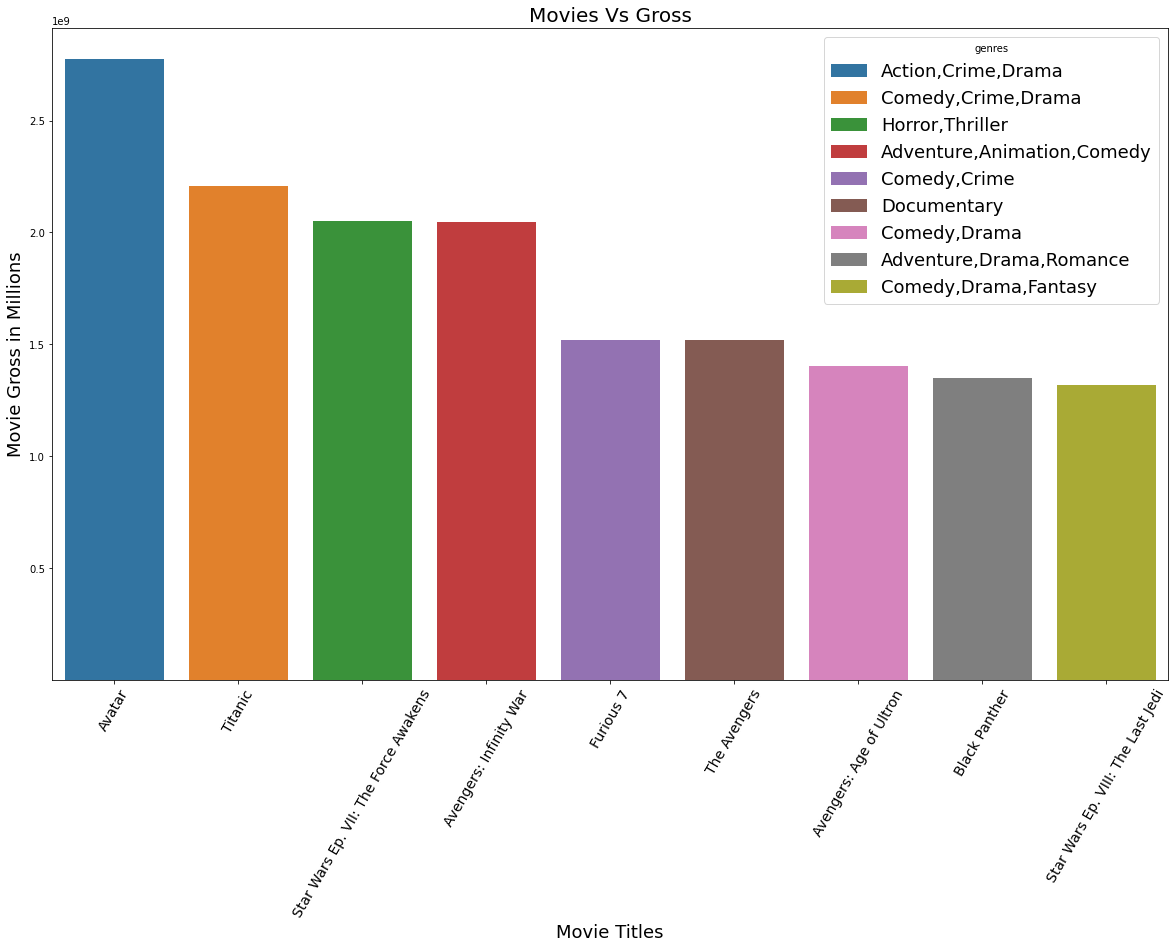

In [128]:
#plotting the data above
fig, ax2= plt.subplots(figsize=(20,12))
ax2 = sns.barplot(data = largest_gross_df, x = 'movie', y = 'worldwide_gross_m', hue = 'genres', ax = ax2, dodge=False)

labels = list(largest_gross_df['movie'])
ax2.set_title('Movies Vs Gross', fontsize=20)
ax2.set_xlabel("Movie Titles",fontsize=18)
ax2.set_ylabel("Movie Gross in Millions", fontsize=18)
ax2.set_ylim(1000)
ax2.legend(title='genres', fontsize=18, loc=1)

ax2.set_xticklabels(labels = labels, rotation = 60,fontsize=14)


fig.savefig('Movies Vs Gross - genres).png');

<ipython-input-126-2a07af1e54de>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels = y,fontsize=14)
C:\Users\omen 15\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\omen 15\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\omen 15\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\omen 15\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


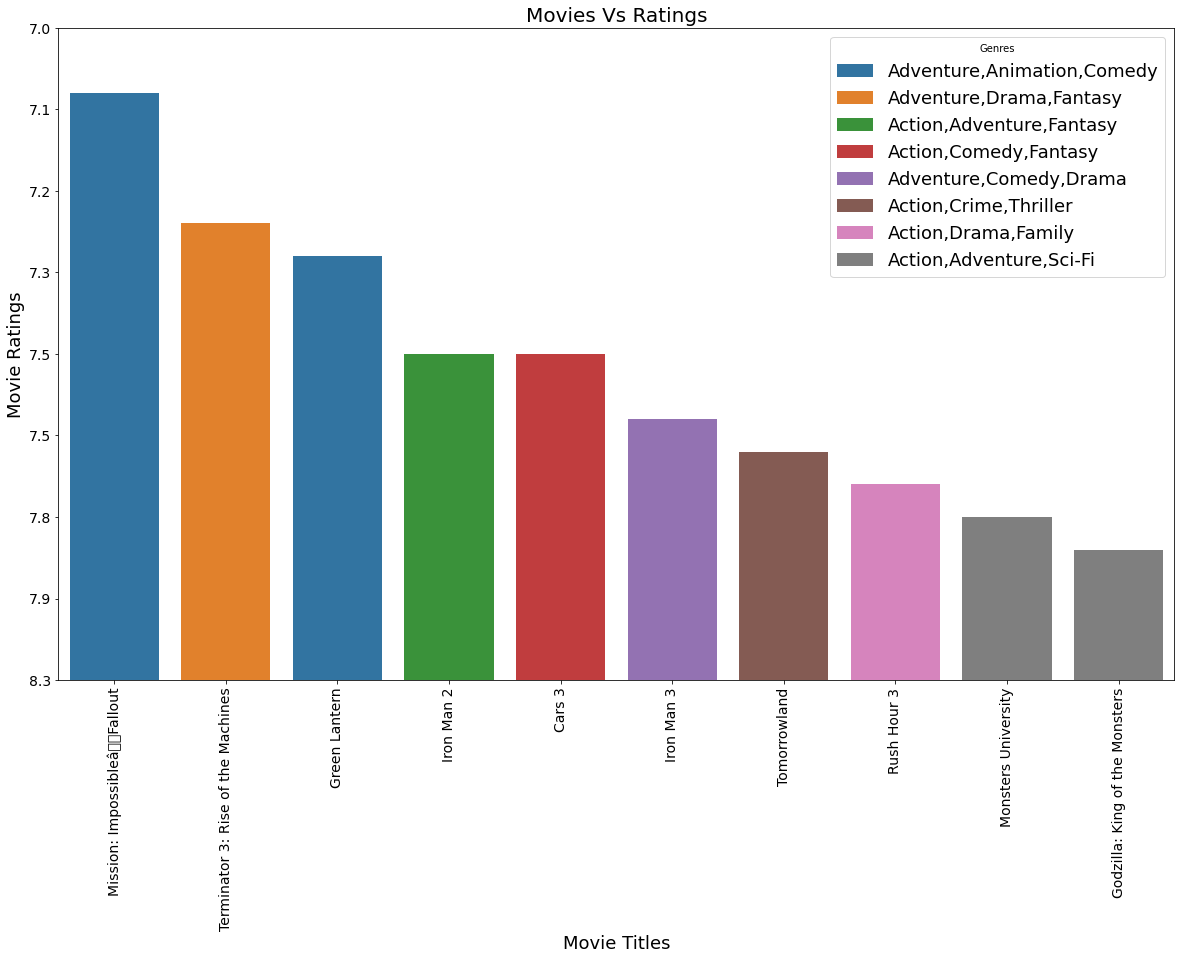

In [126]:
fig, ax1= plt.subplots(figsize=(20,12))

x = list(movie_ratings['movie'].values)
y = movie_ratings['averagerating']

ax1 = sns.barplot(data = movie_ratings, x = 'movie', y = 'averagerating', hue = 'genres', ax = ax1, dodge=False)

ax1.set_title('Movies Vs Ratings', fontsize=20)
ax1.set_xlabel("Movie Titles",fontsize=18)
ax1.set_ylabel("Movie Ratings", fontsize=18)
ax1.legend(title='Genres', fontsize=18, loc=1)
ax1.set_xticklabels(labels = x, rotation = 60,fontsize=14)
ax1.set_yticklabels(labels = y,fontsize=14)

ax1.set_xticklabels(labels = x, rotation = 90)
ax1.set_ylim(6.5, 8.5)
fig.savefig('Movies Vs Ratings - release_date.png')


We can observe from this two tables:
In the movie vs Gross table we can see that the gross income is highest for the god which is in the genre for Action crime and Drama and the lowest is star wars jedi which had low gross with comedy,drama and fantasy.

In the movies vs Rating table we see that the highest rated movies is action adventure and scifi in godzilla which also is seen in the monsters university movie they have both appeared in the table with high ratings and in the genres the most occurence are action movies they seem to be used in the creativity of the movie



## 3.2 Does Budget affect revenue?

,averagerating,numvotes,production_budget_m,domestic_gross_m,worldwide_gross_m,movie_profits_millions
averagerating,1.000000,0.225656,0.031220,-0.062156,-0.036872,-0.042152
numvotes,0.225656,1.000000,-0.167806,-0.092874,-0.105086,-0.091144
production_budget_m,0.031220,-0.167806,1.000000,0.369275,0.466042,0.375327
domestic_gross_m,-0.062156,-0.092874,0.369275,1.000000,0.906063,0.907513
worldwide_gross_m,-0.036872,-0.105086,0.466042,0.906063,1.000000,0.994998
movie_profits_millions,-0.042152,-0.091144,0.375327,0.907513,0.994998,1.000000


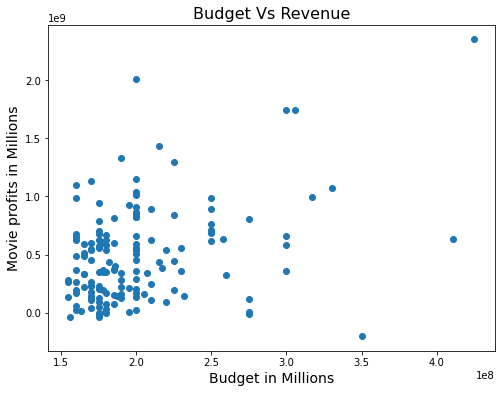

In [96]:
fig, ax= plt.subplots(figsize=(8,6))

x = final_df['production_budget_m']
y = final_df['movie_profits_millions']

ax.scatter(x,y)

ax.set_title('Budget Vs Revenue', fontsize=16)
ax.set_xlabel("Budget in Millions",fontsize=14)
ax.set_ylabel("Movie profits in Millions", fontsize=14)
fig.savefig('Budget vs Revenue.png');
final_df.corr(method='pearson', min_periods=1)

This table gives us a psoitive correlation between production budgets and movie profits as budget rises profit increases 

## 3.3 Does Rating affect Revenue

,averagerating,numvotes,production_budget_m,domestic_gross_m,worldwide_gross_m,movie_profits_millions
averagerating,1.000000,0.225656,0.031220,-0.062156,-0.036872,-0.042152
numvotes,0.225656,1.000000,-0.167806,-0.092874,-0.105086,-0.091144
production_budget_m,0.031220,-0.167806,1.000000,0.369275,0.466042,0.375327
domestic_gross_m,-0.062156,-0.092874,0.369275,1.000000,0.906063,0.907513
worldwide_gross_m,-0.036872,-0.105086,0.466042,0.906063,1.000000,0.994998
movie_profits_millions,-0.042152,-0.091144,0.375327,0.907513,0.994998,1.000000


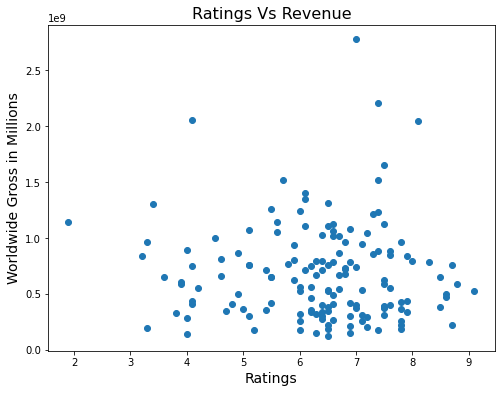

In [97]:
fig, ax= plt.subplots(figsize=(8,6))

x = final_df['averagerating']
y = final_df['worldwide_gross_m']

ax.scatter(x,y)

ax.set_title('Ratings Vs Revenue', fontsize=16)
ax.set_xlabel("Ratings",fontsize=14)
ax.set_ylabel("Worldwide Gross in Millions", fontsize=14)
fig.savefig('Ratings vs Revenue.png');
final_df.corr(method='pearson', min_periods=1)

This table it shows a negative correlation between rating and world wide gross(revenue) this means that ratings does not affect the worldwide gross

## 3.4 The best time to debut a movie

In [98]:
final_df.shape

(150, 9)

In [99]:
final_df.isna().sum()

genres                    5
averagerating             0
numvotes                  0
release_date              0
movie                     0
production_budget_m       0
domestic_gross_m          0
worldwide_gross_m         0
movie_profits_millions    0
dtype: int64

In [100]:
final_df.dropna(axis=0, subset = ['genres'], inplace=True)

In [101]:
final_df.shape

(145, 9)

In [102]:
final_df['release_date'] = pd.to_datetime(final_df['release_date'])

In [103]:
final_df.head(3)

,genres,averagerating,numvotes,release_date,movie,production_budget_m,domestic_gross_m,worldwide_gross_m,movie_profits_millions
0,"Action,Crime,Drama",7.0,77,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
1,"Biography,Drama",7.2,43,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,Drama,6.9,4517,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650


In [104]:
final_df['release_month'] = final_df['release_date'].dt.month

In [105]:
final_df.head(3)

,genres,averagerating,numvotes,release_date,movie,production_budget_m,domestic_gross_m,worldwide_gross_m,movie_profits_millions,release_month
0,"Action,Crime,Drama",7.0,77,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,12
1,"Biography,Drama",7.2,43,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
2,Drama,6.9,4517,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,6


In [106]:
month_gross_mean = final_df.groupby('release_month')['worldwide_gross_m'].mean()

In [107]:
monthly_mean_gross = pd.DataFrame(month_gross_mean)
monthly_mean_gross.reset_index(drop=False, inplace=True)

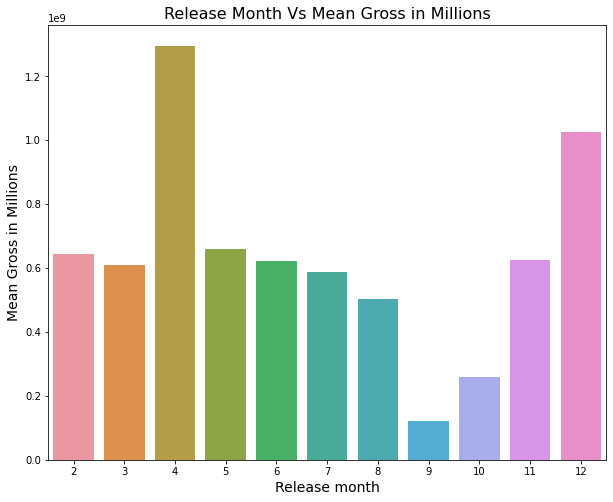

In [108]:
fig, ax = plt.subplots(figsize=(10,8))

x = monthly_mean_gross['release_month']
y = monthly_mean_gross['worldwide_gross_m']

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Release Month Vs Mean Gross in Millions', fontsize=16)
ax.set_xlabel("Release month",fontsize=14)
ax.set_ylabel("Mean Gross in Millions", fontsize=14);

#ax.set_xticklabels(labels = x)
fig.savefig('Release Month Vs Mean Gross in Millions.png');

In [109]:
final_df['release_month']

0      12
1       5
2       6
3       5
4      12
       ..
145     6
146     9
147    12
148     7
149     3
Name: release_month, Length: 145, dtype: int64

the best time we can see from this plot is that in april which is the 4th month is where when you released a movie the mean income was the highest compared to the other months and september which is the 9th month is not the best time to release a movie cause the mean income was low

# 4.Conclusion

1. Movies with a highbudget income tend to bring high profit income 
2. Highly rated movies tend to give high profits
3. The genres to venture into are action adventure and scifi this have high ratings
4. Best month to release a movie is in the month of april

# 5.Recommendations
1. I would tell the company to invest in action adventure and scifi movies
2. I will tell them to release their movies in april due to high gross
3. i will tell them that the production of movies will give maximum profits depending on the fan base of people and high   ratings
